In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller

In [2]:
def adf_fuller_test(series):
    result = adfuller(series)
    labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for label,value in zip(labels,result):
        print(label,':',str(value))

In [3]:
series = pd.read_csv('catfish.csv',parse_dates=['Date'],index_col=0,squeeze=True)
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]
series = series.diff().diff().dropna()
series

Date
2004-03-01   -1067.0
2004-04-01   -4131.0
2004-05-01    3543.0
2004-06-01     401.0
2004-07-01    -405.0
               ...  
2012-08-01     353.0
2012-09-01   -2186.0
2012-10-01    1393.0
2012-11-01    -816.0
2012-12-01    -193.0
Freq: MS, Name: Total, Length: 106, dtype: float64

In [4]:
adf_fuller_test(series)

ADF Test Statistic : -7.162321332721427
p-value : 2.9462095956888277e-10
Lags Used : 12
Number of Observations Used : 93


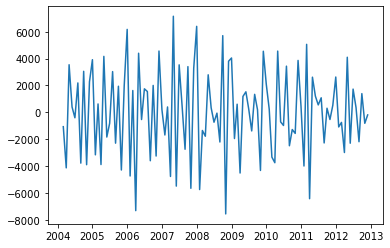

In [5]:
plt.plot(series)

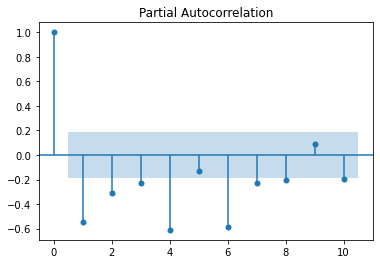

In [6]:
plot_pacf(series, lags=10)
plt.show()

#### Either AR(1), AR(4), AR(6), or AR(10)

C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


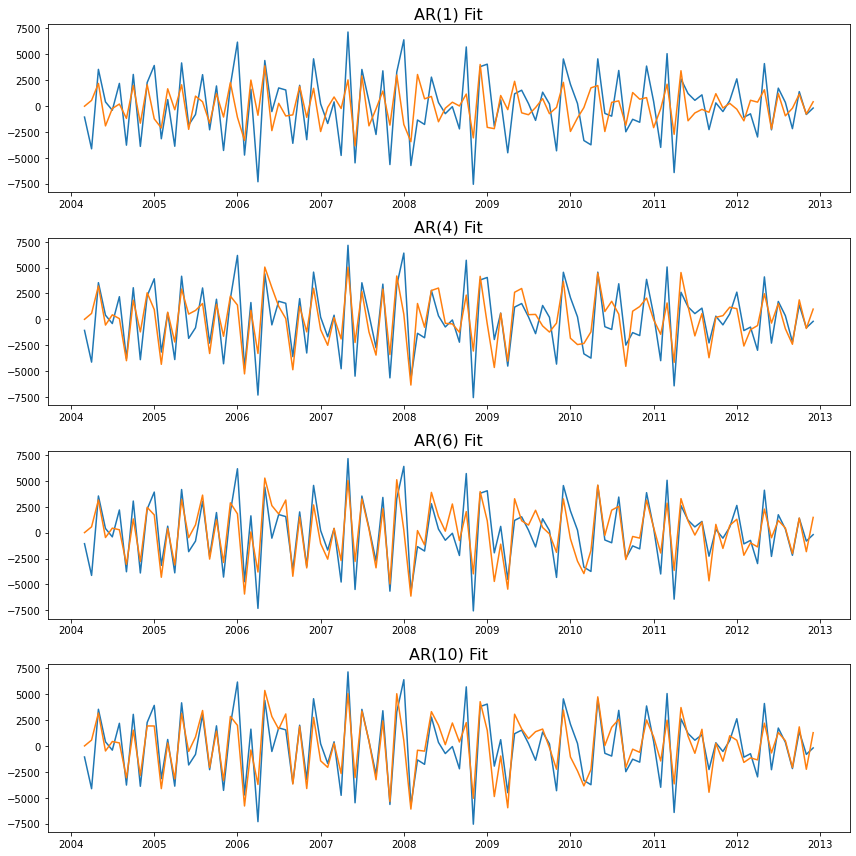

In [7]:
plt.figure(figsize=(12,12))
ar_orders = [1,4,6,10]
fitted_model_dict = {}

for idx,ar_order in enumerate(ar_orders):
    ar_model = ARMA(series,order=(ar_order,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(4,1,idx+1)
    plt.plot(series)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title('AR(%s) Fit'%ar_order, fontsize=16)
    
plt.tight_layout()

## Each model has:
### a log likelihood ($l$)
### a number of parameters ($k$)
### a number of samples used for fitting ($n$)
#### AIC = 2$k$ - 2$l$
#### Lower AIC via higher log likelihood or less parameters
#### BIC = $\ln(n)k$ - 2$l$
#### Lower BIC via higher log likelihood or less parameters or less samples used in fitting

In [8]:
#AIC comparison
for ar_order in ar_orders:
    print('AIC for AR({}): {}'.format(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(1): 1980.856314353841
AIC for AR(4): 1927.4507591069998
AIC for AR(6): 1899.6302659616672
AIC for AR(10): 1902.264791273558


AR(6) is better as per AIC

In [9]:
#BIC comparison
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): 1988.8466316361773
BIC for AR(4): 1943.4313936716721
BIC for AR(6): 1920.9377787145638
BIC for AR(10): 1934.226060402903
